In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
d=pd.read_csv("/content/Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
d.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [ ]:
d.shape

(200, 5)

In [ ]:
d.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
d['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


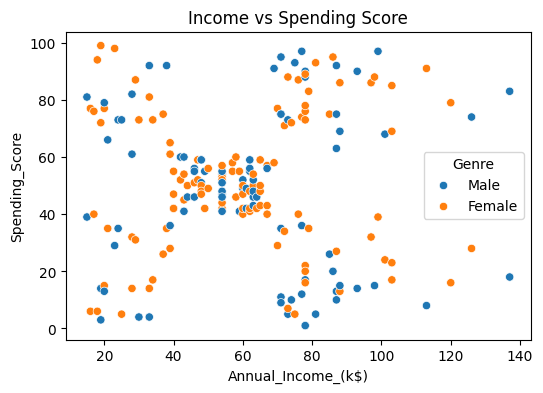

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Genre', data=d)
plt.title("Income vs Spending Score")
plt.show()

In [ ]:
X = d[['Age', 'Annual_Income_(k$)', 'Genre']]
X = pd.get_dummies(X, drop_first=True)

y = d['Spending_Score']

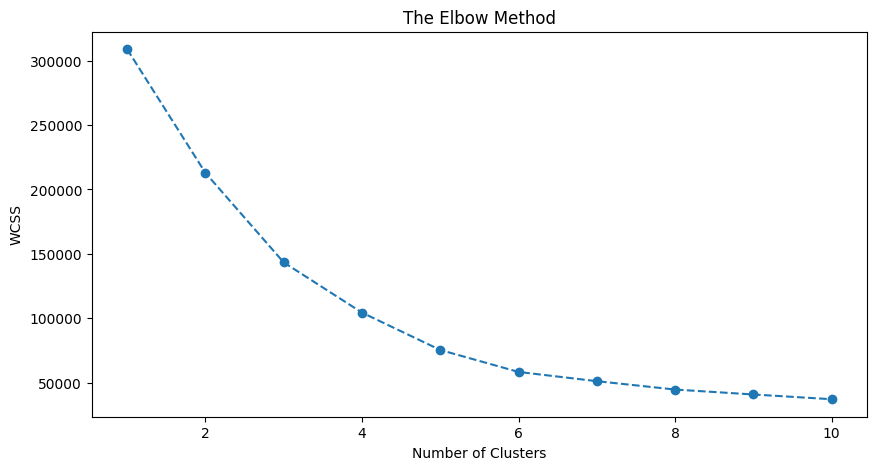

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(d.iloc[:,2:])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
kmeans.inertia_

39551.60942422726

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

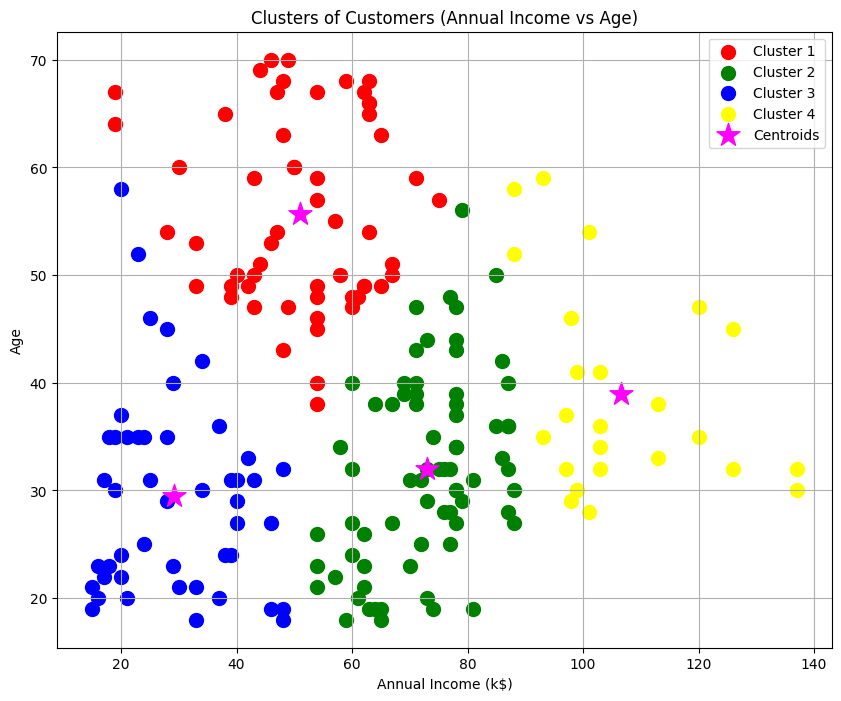

In [ ]:
kmeans=(KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10))
yKmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))

# Correcting the indexing with .iloc for row and column selection
# X-axis: Annual Income (k$) which is at index 1 in DataFrame X
# Y-axis: Age which is at index 0 in DataFrame X
plt.scatter(X.iloc[yKmeans == 0, 1], X.iloc[yKmeans == 0, 0], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[yKmeans == 1, 1], X.iloc[yKmeans == 1, 0], s=100, c='green', label='Cluster 2')
plt.scatter(X.iloc[yKmeans == 2, 1], X.iloc[yKmeans == 2, 0], s=100, c='blue', label='Cluster 3')
plt.scatter(X.iloc[yKmeans == 3, 1], X.iloc[yKmeans == 3, 0], s=100, c='yellow', label='Cluster 4')

# Centroids plotting is already correct for the specified x and y axes
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'magenta', label = 'Centroids', marker='*')

plt.title('Clusters of Customers (Annual Income vs Age)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()